Copyright (C) 2020 Ralph "Blake" Vente and Anthony Chen

orpheus is free software: you can redistribute it and/or modify it under the
terms of the GNU General Public License as published by the Free Software
Foundation, either version 3 of the License, or (at your option) any later
version.

This program queries the filesysytem's logs and produces charts based on the
experiments in those logs.

This one in particular performs things for our naive bayes experiment.

In [1]:
import sys
sys.path.append('.')
from pathlib import Path
import numpy as np
import pandas as pd
import incense
from incense.experiment_loader import FileSystemExperimentLoader

basedir = Path("../logs/")
loader = FileSystemExperimentLoader(basedir)
loader

FileSystemExperimentLoader("../logs")

In [3]:
import matplotlib.pyplot as plt
import matplotlib

In [165]:
# Hack: only run this cell _after_ generating some other graph first.
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [4]:
def plot(dataframe, title="Title", xlabel="xlabel", ylabel="ylabel"):
    graph = dataframe.rename(columns={"review_contents": "review contents", "pos_tags": "POS tags L0", "path_pos_bigrams": "POS paths L1", "nested_pos_bigrams" : 'POS nested pairs', 'path_pos_trigrams': 'POS paths L2'}).plot(title=title)
    graph.set_xlabel(xlabel)
    graph.set_ylabel(ylabel)
    return graph.get_figure()


In [5]:
start = 447
end = 512
df = pd.DataFrame()
for i in range(start,end):
    exp = loader.find_by_id(i)
    cfg = exp.config
    feat = cfg['dataset']['feature_column']
    alpha = cfg['naivebayes']['alpha']
    df.loc[alpha, feat] = exp.result.value

df.to_pickle('../results/nb_x_alpha_df_acc.pkl')
df

,review_contents,pos_tags,nested_pos_bigrams,path_pos_bigrams,path_pos_trigrams
0.00010,0.564000,0.398667,0.319333,0.390667,0.273333
0.00020,0.588000,0.441333,0.350000,0.428000,0.303333
0.00030,0.601333,0.460000,0.370000,0.454667,0.330667
0.00050,0.623333,0.495333,0.399333,0.494667,0.359333
0.00075,0.648667,0.520667,0.424667,0.523333,0.394667
0.00100,0.666667,0.538000,0.446000,0.550000,0.411333
0.00200,0.704000,0.586667,0.502667,0.605333,0.468000
0.00300,0.726000,0.615333,0.532000,0.622000,0.495333
0.00400,0.734667,0.630000,0.560000,0.638000,0.507333
0.00500,0.746000,0.638667,0.575333,0.647333,0.504667


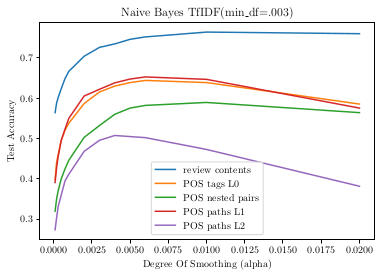

In [249]:
dataplot = plot(df, title="Naive Bayes TfIDF(min\_df=.003)", xlabel="Degree Of Smoothing (alpha)", ylabel="Test Accuracy")


In [250]:
dataplot.savefig('../figures/nb_x_alpha.pdf')